In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import requests
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp


#Part 1: Exploratory Data Analysis on housing data

#lading the housing dataset into a data frame
df = pd.read_csv(r"C:\Users\weizi\Desktop\IE 517\hw 4\housing.csv")

# 1.0 Display the first five rows of housing data in Table to confirm
#that the data set was loaded successfully.
df.head()

#Target variable(the variable that we want to predict using one or more 
#of the 13 explanatory variables) is MEDV (house prices)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
number_of_rows = len(df)
print("The number of rows:", number_of_rows)

print("The number of colmuns:",len(df.columns))

print("The number of cells:",df.size)

# 1.1 Generate descriptive statistics
descriptive_stat = df.describe()
print(descriptive_stat)

The number of rows: 506
The number of colmuns: 14
The number of cells: 7084
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043   

C:\Users\weizi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


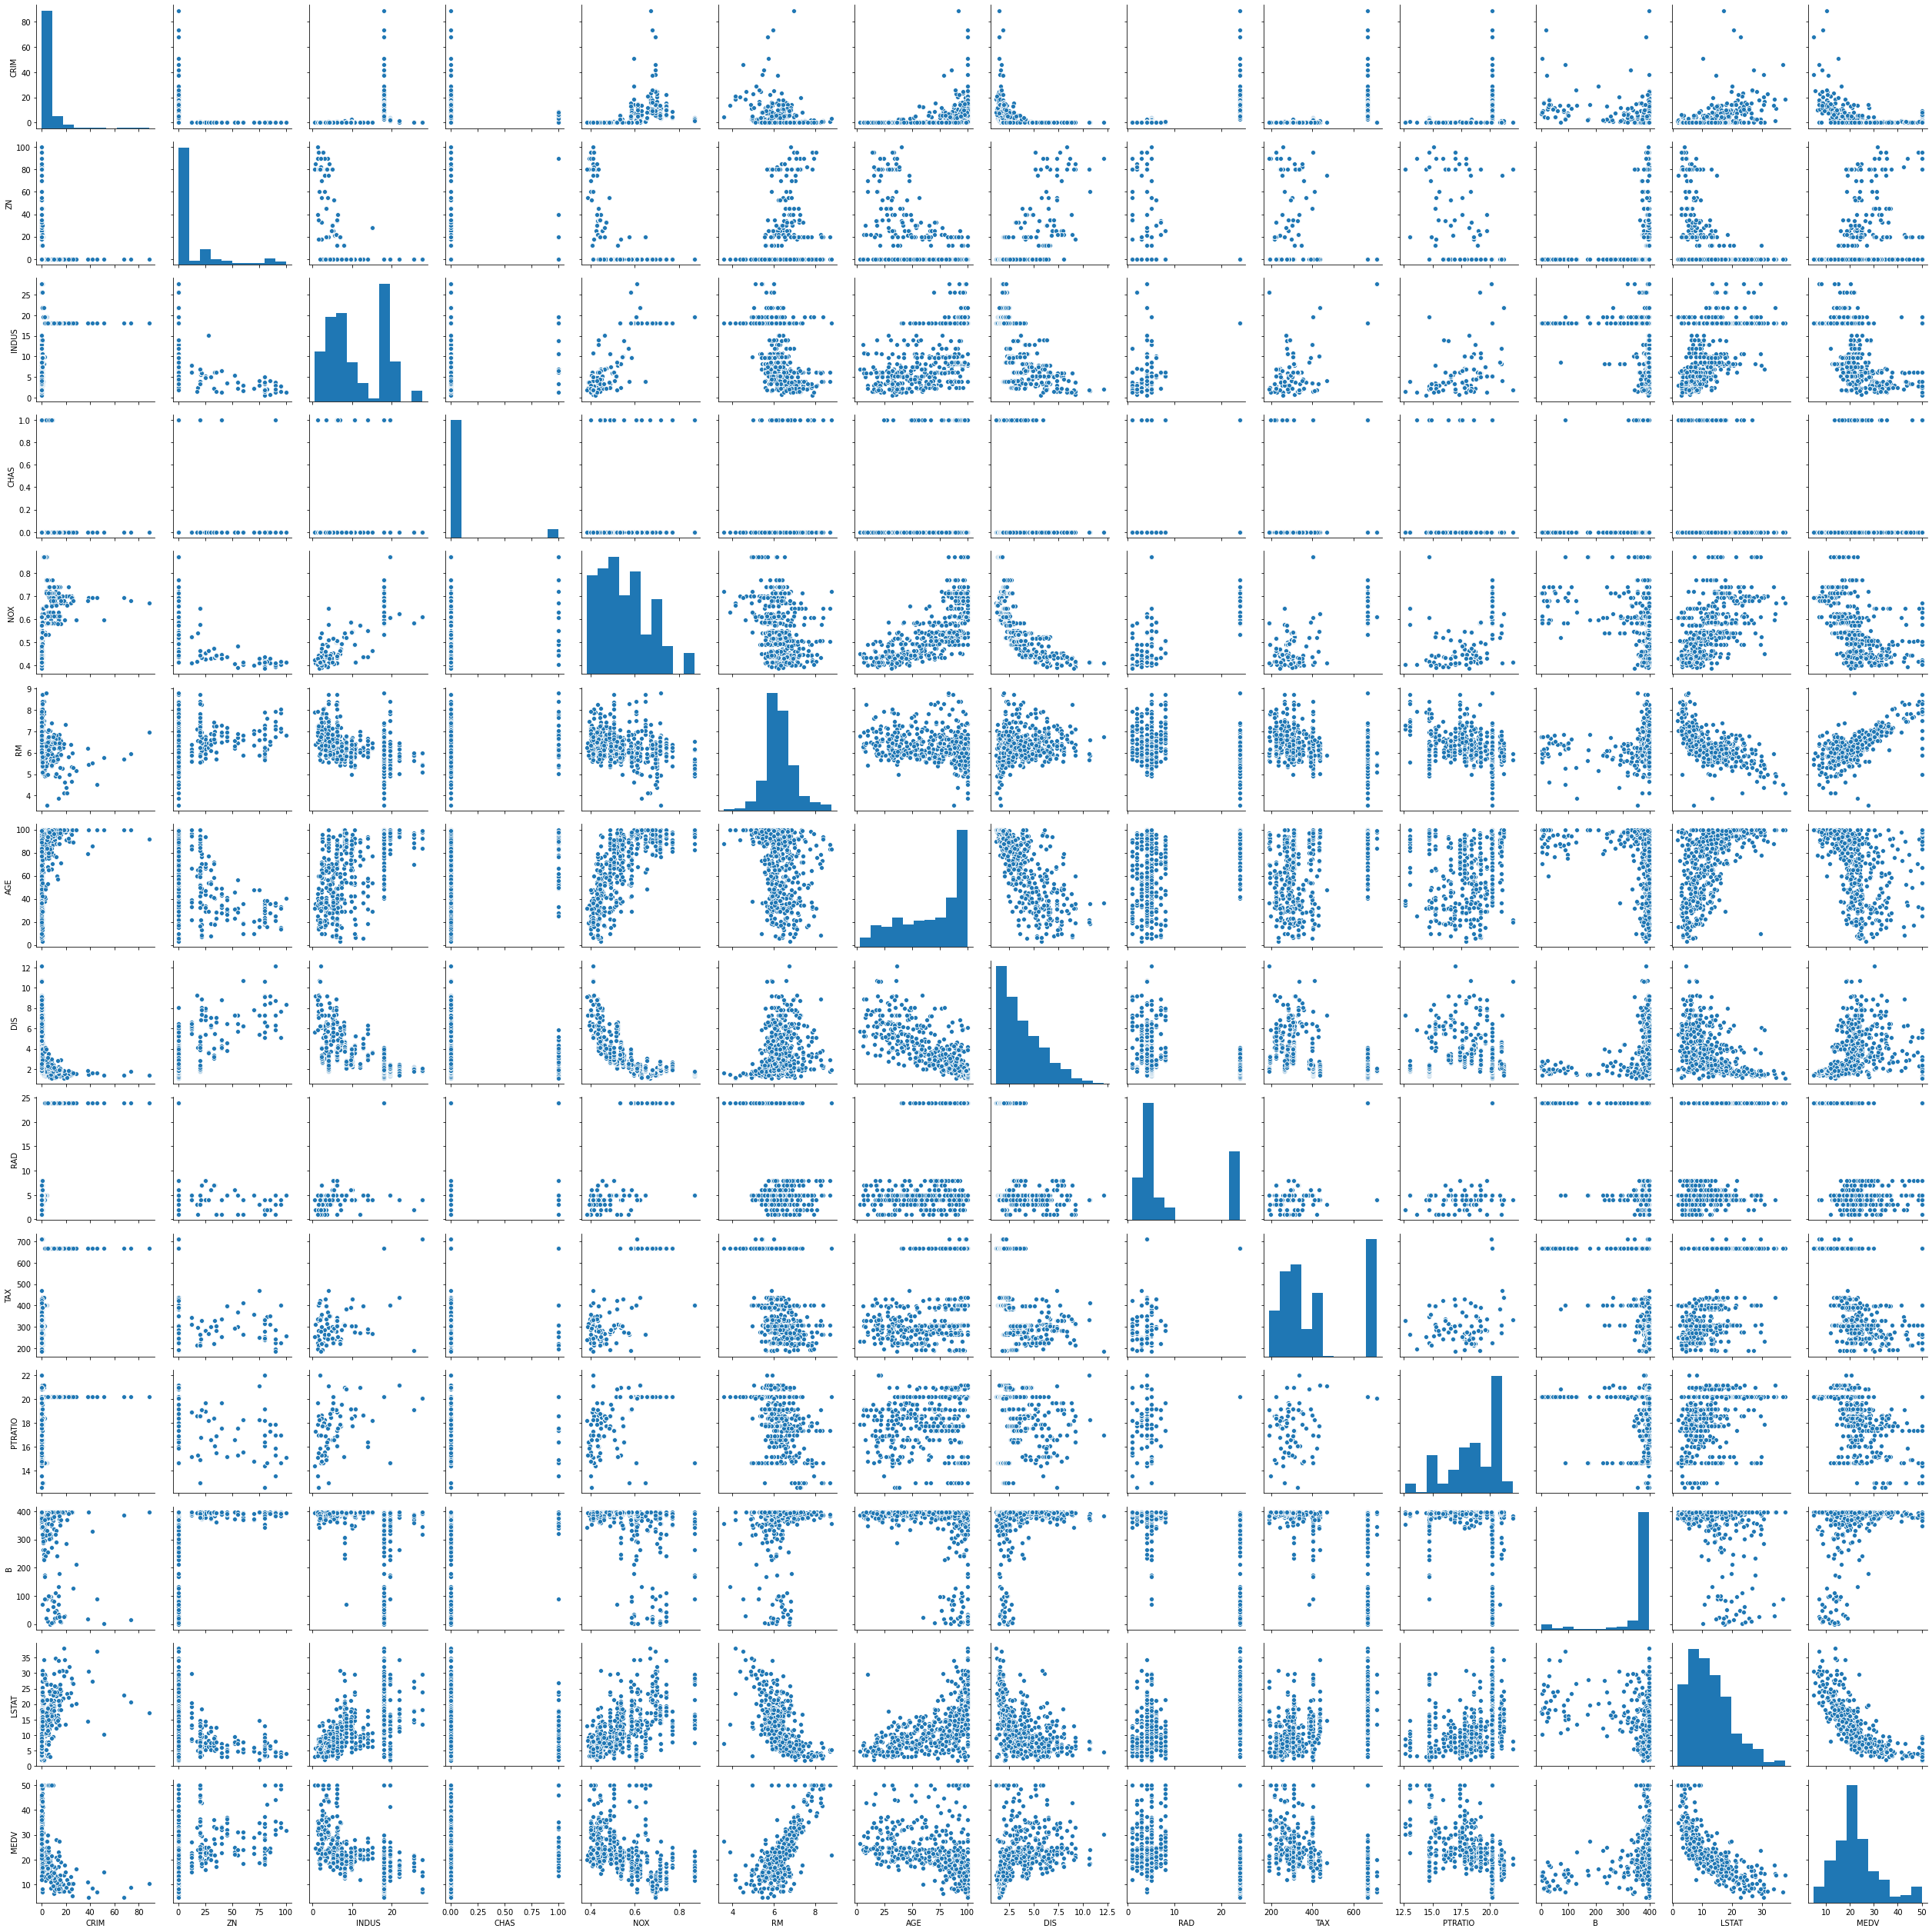

In [3]:
#1.2 Scatterplot matrix (visualizing the pair-wise correlation between
#different features)

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#define cols as the subset of the data
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

#Plot all the features
sns.pairplot(df, size= 2.5)
#minimize the white space
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

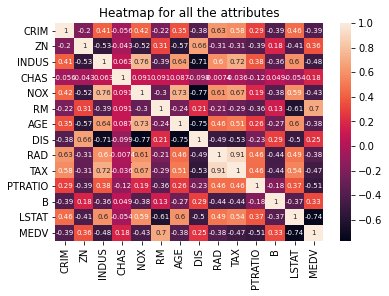

In [40]:
#1.3 Heatmap for all atributes
cm=DataFrame(df.corr())
sns.heatmap(cm,annot=True, annot_kws = {'size':7})
plt.title('Heatmap for all the attributes')
plt.show


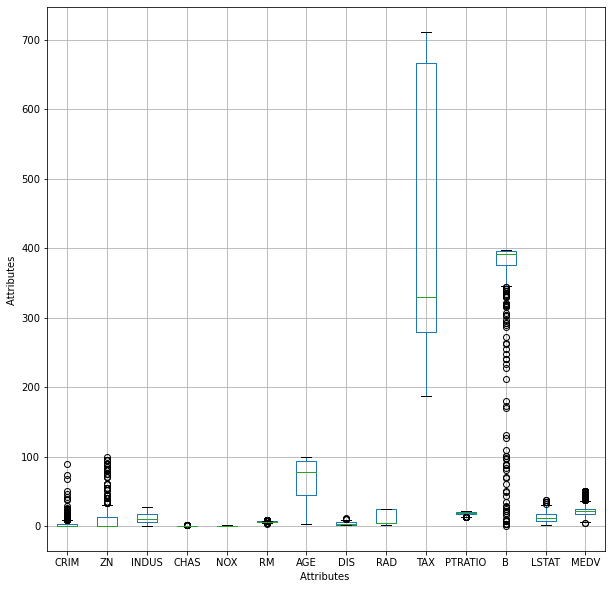

In [32]:
#1.4 Box plots



df.boxplot(figsize = (10,10))


_ = plt.xlabel('Attributes ')
_ = plt.ylabel('Attributes ')


plt.show()


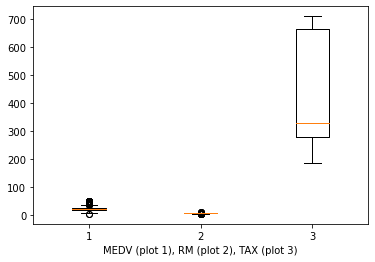

In [35]:
#Box plot for MEDV and RM, TAX
#Which shows that MEDV has lots of high outliers

plt.boxplot(df[['MEDV','RM', 'TAX']].values)
_ = plt.xlabel('MEDV (plot 1), RM (plot 2), TAX (plot 3)')


plt.show()

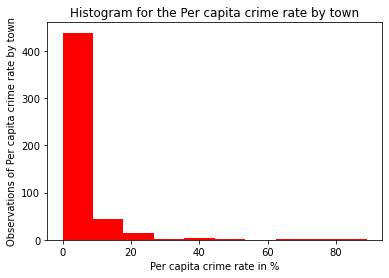

In [31]:
#1.5 Histogram for CRIM
_= plt.hist(df['CRIM'], color = 'red')
_=plt.title('Histogram for the Per capita crime rate by town')
_=plt.xlabel('Per capita crime rate in %')
_=plt.ylabel('Observations of Per capita crime rate by town')
plt.show()



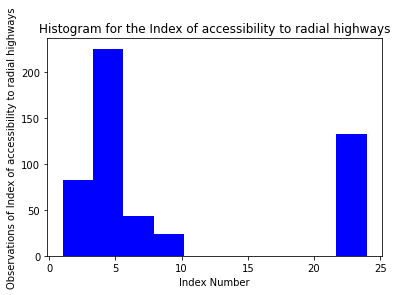

In [12]:
# Histogram for RAD
_= plt.hist(df['RAD'], color = 'blue')
_=plt.title('Histogram for the Index of accessibility to radial highways')
_=plt.xlabel('Index Number')
_=plt.ylabel('Observations of Index of accessibility to radial highways')
plt.show()


In [46]:
# Part 2: Linear regression

#2.1 Solving regression for regression parameters with gradient descent

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [47]:
X = df[['RM']].values
y = df['MEDV'].values

In [48]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [49]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

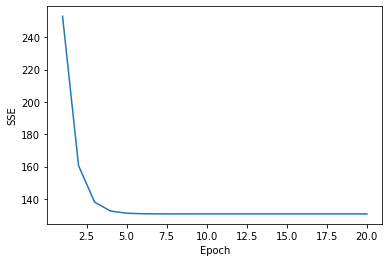

In [50]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()


In [51]:

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

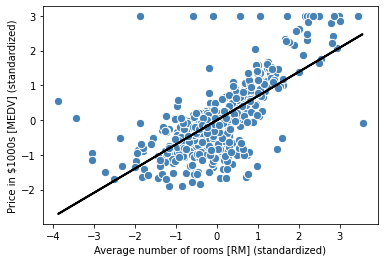

In [52]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [53]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [54]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


In [56]:
#2.2 Evaluating the performance of linear regression models

In [59]:
#Spliting data into train, test sets
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [60]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [61]:
ary = np.array(range(100000))


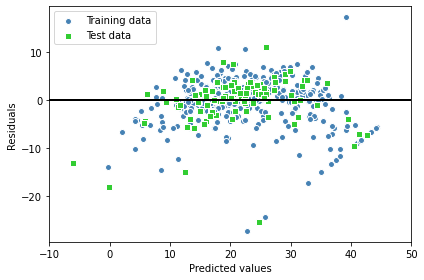

In [62]:
#Plot the residual plot
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [64]:
#Calculating R^2 score and MSE for linear regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [155]:
#Part 3: Ridge regression:

# 3.1 Ridge regression:

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

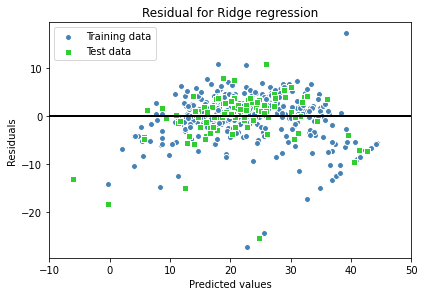

In [156]:
#Plot the residual for Ridge regression:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title('Residual for Ridge regression')

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [157]:
#MSE and R^2 score for Ridge regression: 

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21.646, test: 24.301
R^2 train: 0.751, test: 0.669


[-0.07759253  0.02873786 -0.          0.         -0.          1.7209079
  0.01533583 -0.64843798  0.22064146 -0.01232872 -0.70981541  0.01125168
 -0.74117658]


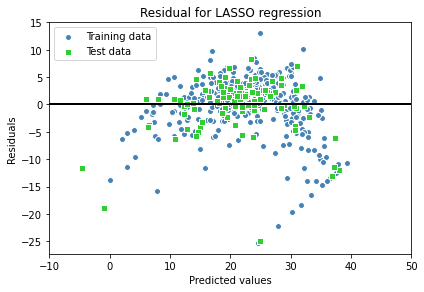

In [131]:
# 3.2 LASSO Regression: 

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.97)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)


#Plot the residual for LASSO regression:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title('Residual for LASSO regression')


# plt.savefig('images/10_09.png', dpi=300)
plt.show()


In [129]:
#Find out the best alpha for LASSO

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 26.211, test: 24.357
R^2 train: 0.698, test: 0.668


In [148]:
# Finding the best alpha for LASSO 2 

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.7)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train: 24.639, test: 24.154
R^2 train: 0.716, test: 0.671


In [ ]:
print("My name is {Zicheng Wei}")
print("My NetID is: {wei41}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")